いい感じに決定木ができていそうだからこれで最終型にしたい
エンコード難読化で改行なしコードつくるの忘れてたから修正

In [6]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz

In [7]:
df = pd.read_csv('../../data/obf_data.csv')
df

,type,file,dir,max_len,alphabets,numbers,symbols,blank,unique_chars,unique_words,...,num_per,sym_per,blank_per,alpha_pew,num_pew,sym_pew,blank_pew,u_chars_per,u_words_per,u_char>u_word
0,0,m.addthis.com-live-red_lojson-300lo.json85aa3b...,data/normal,101,59,20,22,0,2,2,...,0.198020,0.217822,0.000000,0.584158,0.198020,0.217822,0.000000,0.019802,0.019802,False
1,0,wd.sharethis.com-api-getCount2.php5e96692c7cfd,data/normal,187,122,7,57,1,4,5,...,0.037433,0.304813,0.005348,0.655914,0.037634,0.306452,0.005376,0.021390,0.026738,False
2,0,maps.googleapis.com-maps-api-js-QuotaService.R...,data/normal,62,26,7,25,4,7,0,...,0.112903,0.403226,0.064516,0.448276,0.120690,0.431034,0.068966,0.112903,0.000000,True
3,0,www.ritsumei.ac.jp-se-re-fujiedalab-img-jquery...,data/normal,143,6111,99,2509,2991,286,67,...,0.008454,0.214261,0.255423,0.700883,0.011355,0.287762,0.343044,0.024424,0.005722,True
4,0,www.ritsumei.ac.jp-gsls-common-js-script.js,data/normal,154,2359,210,2037,409,110,26,...,0.041874,0.406181,0.081555,0.512158,0.045593,0.442249,0.088797,0.021934,0.005184,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18761,2,www.ritsumei.ac.jp-intl-cn-common-js-zoommap.js,data/created_obfscator_rc4_compact,27923,12545,7867,7382,129,1301,200,...,0.281739,0.264370,0.004620,0.451356,0.283047,0.265597,0.004641,0.046592,0.007163,True
18762,2,www.apu.ac.jp-iaaps-themes-iapps-js-news.js-49...,data/created_obfscator_rc4_compact,13370,5952,3701,3657,60,588,44,...,0.276814,0.273523,0.004488,0.447183,0.278062,0.274756,0.004508,0.043979,0.003291,True
18763,2,maps.googleapis.com-maps-api-js-QuotaService.R...,data/created_obfscator_rc4_compact,3883,1558,1314,991,20,111,3,...,0.338398,0.255215,0.005151,0.403313,0.340150,0.256536,0.005177,0.028586,0.000773,True
18764,2,www.ritsumei.ac.jp-ru_gr-g-ta-common-js-jquery...,data/created_obfscator_rc4_compact,33032,14105,9935,8802,190,1544,273,...,0.300769,0.266469,0.005752,0.429481,0.302509,0.268010,0.005785,0.046743,0.008265,True


In [8]:
df_target = df['type']
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: type, dtype: int64

In [9]:
df_data = df.drop(['type', 'file', 'dir'], axis=1)
df_data.head()

,max_len,alphabets,numbers,symbols,blank,unique_chars,unique_words,alpha_per,num_per,sym_per,blank_per,alpha_pew,num_pew,sym_pew,blank_pew,u_chars_per,u_words_per,u_char>u_word
0,101,59,20,22,0,2,2,0.584158,0.198020,0.217822,0.000000,0.584158,0.198020,0.217822,0.000000,0.019802,0.019802,False
1,187,122,7,57,1,4,5,0.652406,0.037433,0.304813,0.005348,0.655914,0.037634,0.306452,0.005376,0.021390,0.026738,False
2,62,26,7,25,4,7,0,0.419355,0.112903,0.403226,0.064516,0.448276,0.120690,0.431034,0.068966,0.112903,0.000000,True
3,143,6111,99,2509,2991,286,67,0.521862,0.008454,0.214261,0.255423,0.700883,0.011355,0.287762,0.343044,0.024424,0.005722,True
4,154,2359,210,2037,409,110,26,0.470389,0.041874,0.406181,0.081555,0.512158,0.045593,0.442249,0.088797,0.021934,0.005184,True


In [10]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(df_data, df_target)

In [11]:
pred = clf.predict(df_data)
pred

array([0, 1, 0, ..., 2, 2, 2])

正答率を表示

In [12]:
sum(pred == df_target) / len(df_target)

0.8994458062453373

In [13]:
df_data.columns

Index(['max_len', 'alphabets', 'numbers', 'symbols', 'blank', 'unique_chars',
       'unique_words', 'alpha_per', 'num_per', 'sym_per', 'blank_per',
       'alpha_pew', 'num_pew', 'sym_pew', 'blank_pew', 'u_chars_per',
       'u_words_per', 'u_char>u_word'],
      dtype='object')

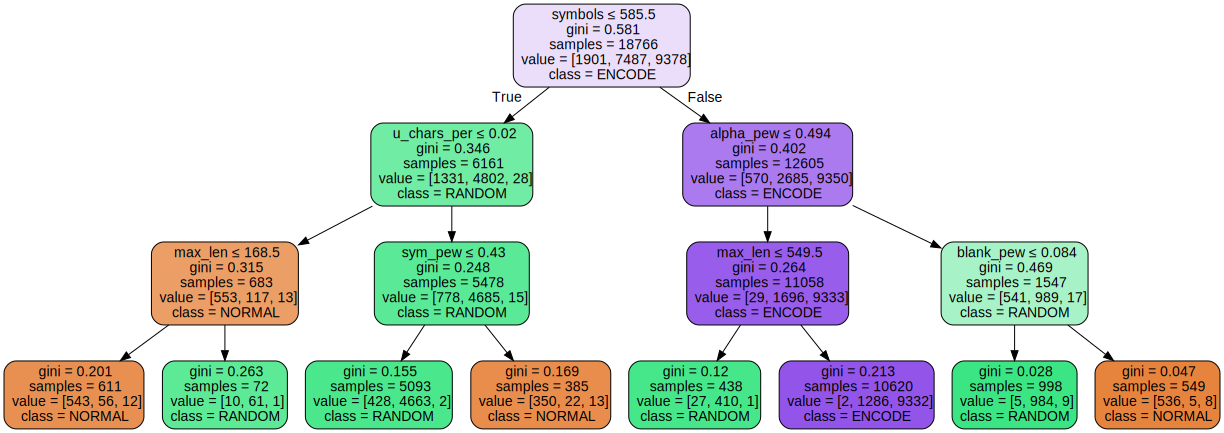

In [14]:
target = ['NORMAL', 'RANDOM', 'ENCODE']
graph = tree.export_graphviz(clf, feature_names=df_data.columns, class_names=target, out_file=None, filled=True, rounded=True, special_characters=True)
image = graphviz.Source(graph)
image

In [15]:
tree.export_graphviz(clf, out_file='0124.dot', feature_names=df_data.columns, class_names=target, filled=True, rounded=True, special_characters=True)

In [16]:
# ファイルのpng化
!dot -Tpng 0124.dot -o 0124.png

学習済み分類木の保存

In [17]:
import pickle
save_model_name = 'experimental-tree.pkl'
with open(save_model_name, 'wb') as f:
    pickle.dump(clf, f)

In [20]:
save_model_name = 'experimental-tree.pkl'
with open(save_model_name, 'rb') as f:
    load_clf = pickle.load(f)

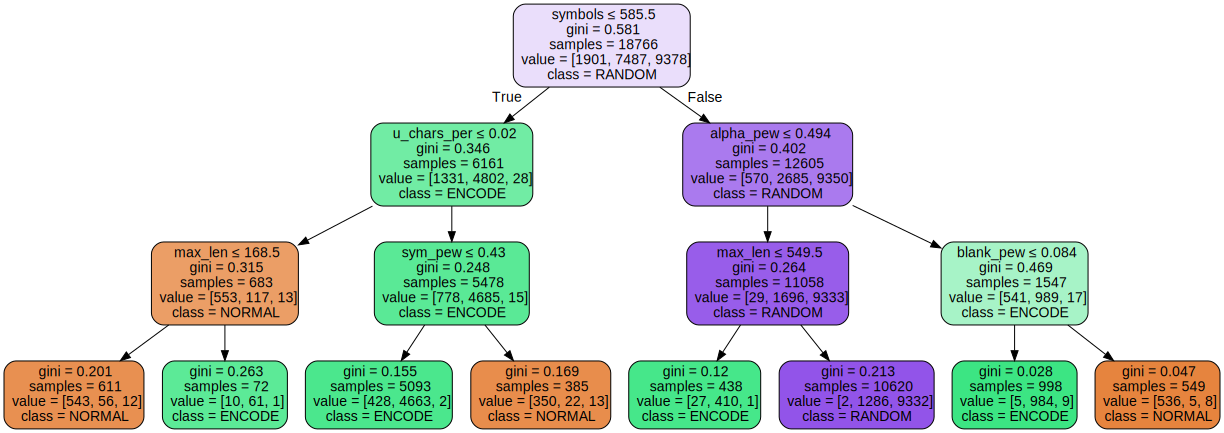

In [21]:
target = ['NORMAL', 'ENCODE', 'RANDOM']
graph = tree.export_graphviz(load_clf, feature_names=df_data.columns, class_names=target, out_file=None, filled=True, rounded=True, special_characters=True)
image = graphviz.Source(graph)
image

In [22]:
data_list = [
{
    'max_len': 83, 
    'alphabets': 3384, 
    'numbers': 55, 
    'symbols': 1063, 
    'blank': 966, 
    'unique_chars': 132, 
    'unique_words': 16, 
    'alpha_per': 0.6188734455010972, 
    'num_per': 0.01005852231163131, 
    'sym_per': 0.19440380395025603, 
    'blank_per': 0.17666422823701536, 
    'alpha_pew': 0.7516659262549977, 
    'num_pew': 0.012216792536650378, 
    'sym_pew': 0.23611728120835185, 
    'blank_pew': 0.2145713016437139, 
    'u_chars_per': 0.024140453547915143, 
    'u_words_per': 0.002926115581565472, 
    'u_char>u_word': True
}, {
    'max_len': 8668, 
    'alphabets': 6641, 
    'numbers': 58, 'symbols': 1983, 'blank': 151, 'unique_chars': 312, 'unique_words': 69, 
    'alpha_per': 0.7518396920638515, 'num_per': 0.006566285520208309, 
    'sym_per': 0.22449903769953583, 'blank_per': 0.01709498471640439, 
    'alpha_pew': 0.7649159179912463, 'num_pew': 0.0066804883667357755, 
    'sym_pew': 0.22840359364201795, 'blank_pew': 0.01739230592029486, 
    'u_chars_per': 0.03532208762594815, 'u_words_per': 0.00781161553266161, 'u_char>u_word': True
}, {
    'max_len': 4106, 'alphabets': 152, 'numbers': 18, 'symbols': 4158, 'blank': 32,
    'unique_chars': 36, 'unique_words': 22, 'alpha_per': 0.03486238532110092, 
    'num_per': 0.004128440366972477, 'sym_per': 0.9536697247706422, 
    'blank_per': 0.007339449541284404, 'alpha_pew': 0.03512014787430684, 
    'num_pew': 0.004158964879852125, 'sym_pew': 0.960720887245841, 
    'blank_pew': 0.0073937153419593345, 'u_chars_per': 0.008256880733944955, 
    'u_words_per': 0.005045871559633028, 'u_char>u_word': True
}
]
for data in data_list:
    print(load_clf.predict([list(data.values())])[0])
# load_clf.predict([list(data.values())])[0]

0
1
2
